# Insights About Airbnb In Hawaii For Visitors

This project is inspired by the [Seattle Airbnb Project](https://www.kaggle.com/airbnb/seattle/data) on Kaggle to explore the Airbnb market in Hawaii for those who are considring a trip to Hawaii. The source is the open data shared by Airbnb available at [Inside Airbnnb site](http://insideairbnb.com/get-the-data.html). In this project, I applied the **CRISP-DM**(CRoss Industry Standard Process for Data Mining) methodology to answer all the intresting qustions. 


## CRISP-DM Process
## 1. Business Understanding
_This is the first phase of CRISP-DM Process -- to understand the business need._ 
  
Hawaii is one of the most popular choices for vacation. For those who are dreaming to visit Hawaii, below questions will help you to understand the local Airbnb market when you plan for a trip: 
  1. When is the cheapest season to visit Hawaii?
  2. Which neigboorhood to live? How's the availability and price among the neighborhoods? 
  3. What are the top 10 factors that affect price and how much you need to pay for the top factors?


## 2. Data Understanding
_This is the second phase of CRISP-DM Process -- to understand the data and conduct exploratory data analysis._  
  
There are tree datasets provided:
+ Listings - including full descriptions and average review score
+ Calendar - including unique id for each reviewer and detailed comments
+ Reviews - including listing id and the price and availability for that day *(not included in this project)*

In [1]:
# Import all required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import re

%matplotlib inline

In [2]:
# Import datasets

df_listings_raw = pd.read_csv('data/listings.csv')
df_calendar_raw = pd.read_csv('data/calendar.csv')
df_reviews_raw = pd.read_csv('data/reviews.csv')

In [3]:
# Set to show all columns

pd.set_option('display.max_columns', None)

### 2.1 Exploratory Data Analysis
### 2.1.1 Calendar Data

In [4]:
df_calendar_raw.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5065,2021-07-09,f,$85.00,$85.00,2.0,700.0
1,87671,2021-07-09,f,$227.00,$227.00,7.0,1125.0
2,87671,2021-07-10,f,$227.00,$227.00,7.0,1125.0
3,87671,2021-07-11,f,$227.00,$227.00,7.0,1125.0
4,87671,2021-07-12,f,$227.00,$227.00,7.0,1125.0


In [5]:
df_calendar_raw.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
7959909,50897989,2022-07-04,t,$129.00,$129.00,1.0,365.0
7959910,50897989,2022-07-05,t,$129.00,$129.00,1.0,365.0
7959911,50897989,2022-07-06,t,$129.00,$129.00,1.0,365.0
7959912,50897989,2022-07-07,t,$129.00,$129.00,1.0,365.0
7959913,50897989,2022-07-08,f,$129.00,$129.00,1.0,365.0


In [6]:
df_calendar_raw.sample(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2205406,20475499,2021-09-25,t,"$5,500.00","$5,500.00",7.0,1125.0
4803119,37291633,2022-01-11,f,"$1,100.00","$1,100.00",5.0,1125.0
7209218,49079739,2022-01-03,t,$200.00,$200.00,30.0,1125.0
574433,6117739,2021-11-10,t,$79.00,$79.00,30.0,120.0
4831837,38353961,2021-08-19,f,$145.00,$145.00,7.0,1125.0


In [7]:
df_calendar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7959914 entries, 0 to 7959913
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 425.1+ MB


In [8]:
df_calendar_raw.shape

(7959914, 7)

In [9]:
df_calendar_raw.nunique()

listing_id        21808
date                367
available             2
price              4666
adjusted_price     4661
minimum_nights       65
maximum_nights      230
dtype: int64

In [10]:
df_calendar_raw.describe()

,listing_id,minimum_nights,maximum_nights
count,7.959914e+06,7.959189e+06,7.959189e+06
mean,3.081775e+07,6.929144e+00,7.060665e+02
std,1.484760e+07,1.472327e+01,5.573123e+02
min,5.065000e+03,1.000000e+00,1.000000e+00
25%,1.896563e+07,2.000000e+00,9.000000e+01
50%,3.233892e+07,3.000000e+00,1.125000e+03
75%,4.514177e+07,5.000000e+00,1.125000e+03
max,5.090137e+07,3.650000e+02,9.999000e+03


In [11]:
df_calendar_raw.describe(include = 'object')

,date,available,price,adjusted_price
count,7959914,7959914,7959184,7959184
unique,367,2,4666,4661
top,2022-01-08,f,$150.00,$150.00
freq,21808,4182243,98778,97920


In [12]:
df_calendar_raw.duplicated().sum()

0

In [13]:
df_calendar_raw.isnull().sum()

listing_id          0
date                0
available           0
price             730
adjusted_price    730
minimum_nights    725
maximum_nights    725
dtype: int64

$150.00      98778
$199.00      95811
$125.00      95188
$250.00      94730
$175.00      86890
             ...  
$4,597.00        1
$2,813.00        1
$2,901.00        1
$2,952.00        1
$3,797.00        1
Name: price, Length: 4666, dtype: int64


<AxesSubplot:ylabel='Frequency'>

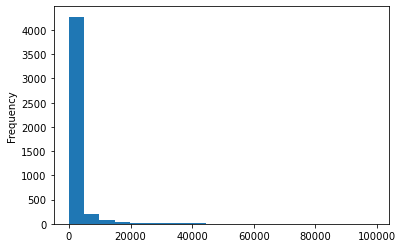

In [14]:
# Explore price range

print(df_calendar_raw.price.value_counts())
df_calendar_raw.price.value_counts().plot(kind = 'hist', bins = 20)

In [15]:
# Explore date range

print(df_calendar_raw.date.sort_values().head(3))
print(df_calendar_raw.date.sort_values().tail(3))

3369937    2021-07-08
2711187    2021-07-08
2601261    2021-07-08
Name: date, dtype: object
1258665    2022-07-08
4492266    2022-07-09
5690748    2022-07-09
Name: date, dtype: object


Text(0, 0.5, 'count')

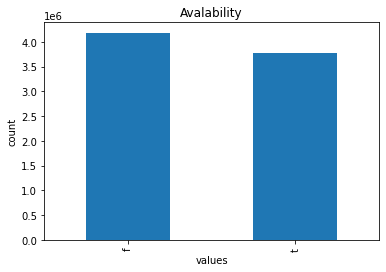

In [16]:
# Check availability

df_calendar_raw.available.value_counts().plot(kind = 'bar')
plt.title('Avalability')
plt.xlabel('values')
plt.ylabel('count')

### Insights

+ Calendar dataset contains 7959914 rows and 7 columns, 0 duplicates. 
+ There are missing values in price, adjusted_price, minimum_nights, maximum_nights columns, but missing values are less than 0.01% overall.
+ The date column is object type instead of datetime type.
+ The price, adjusted_price columns are object type, unable to describe more details.
+ The price record is from 07/2021-07/2022.

### Wrangling

+ Drop unnecessary columns: minimum_nights, maximum_nights
+ Drop missing values
+ Convert date to datetime type
+ Donvert price, adjusted_price to float type. Set float format to keep two decimal digits 
+ Handle outliers in price column

In [17]:
# make a copy of raw dataset

df_calendar = df_calendar_raw.copy()

In [18]:
# Drop not needed columns

df_calendar = df_calendar.drop(columns = ['minimum_nights', 'maximum_nights'], axis = 1)
df_calendar.head()

,listing_id,date,available,price,adjusted_price
0,5065,2021-07-09,f,$85.00,$85.00
1,87671,2021-07-09,f,$227.00,$227.00
2,87671,2021-07-10,f,$227.00,$227.00
3,87671,2021-07-11,f,$227.00,$227.00
4,87671,2021-07-12,f,$227.00,$227.00


In [19]:
# Take a further look at records with missing values
# records with missing values in price column are exact the same as those in adjusted_price column. 
# Missign values are limit to 6 lising_ids

print(df_calendar[df_calendar.price.isna() == True])
print('The number of records that contains missing values in both price and adjusted_price columns: '
      + str((df_calendar_raw[df_calendar_raw.price.isna()].index == df_calendar_raw[df_calendar_raw.adjusted_price.isna()].index).sum()))
print('The number of listing_id with missing values: \n' + str(df_calendar[df_calendar.price.isna() == True]['listing_id'].value_counts()))

         listing_id        date available price adjusted_price
2278595    20786864  2022-07-03         t   NaN            NaN
2278596    20786864  2022-07-04         t   NaN            NaN
2278597    20786864  2022-07-05         t   NaN            NaN
2278598    20786864  2022-07-06         t   NaN            NaN
2278599    20786864  2022-07-07         t   NaN            NaN
...             ...         ...       ...   ...            ...
6906656    48232197  2022-07-03         f   NaN            NaN
6906657    48232197  2022-07-04         f   NaN            NaN
6906658    48232197  2022-07-05         f   NaN            NaN
6906659    48232197  2022-07-06         f   NaN            NaN
6906660    48232197  2022-07-07         f   NaN            NaN

[730 rows x 5 columns]
The number of records that contains missing values in both price and adjusted_price columns: 730
The number of listing_id with missing values: 
47757689    189
47337776    188
21425908    171
31692052    171
20786864    

In [20]:
# Drop missing values

df_calendar.dropna(how = 'any', inplace = True)

In [21]:
# Convert data types
# Convert date to datetime type

df_calendar['date'] = pd.to_datetime(df_calendar.date)

# Convert price, adjusted_price to float type
cols = ['price', 'adjusted_price']
df_calendar[cols] = df_calendar[cols].replace({'\$': '', ',': ''}, regex = True)
df_calendar[cols] = df_calendar[cols].astype(float)

df_calendar.describe()

,listing_id,price,adjusted_price
count,7.959184e+06,7.959184e+06,7.959184e+06
mean,3.081714e+07,3.989370e+02,3.985949e+02
std,1.484776e+07,7.839202e+02,7.836141e+02
min,5.065000e+03,0.000000e+00,0.000000e+00
25%,1.896302e+07,1.560000e+02,1.560000e+02
50%,3.233892e+07,2.490000e+02,2.490000e+02
75%,4.514177e+07,4.060000e+02,4.070000e+02
max,5.090137e+07,2.500000e+04,2.500000e+04


95% price is below: 1100.0


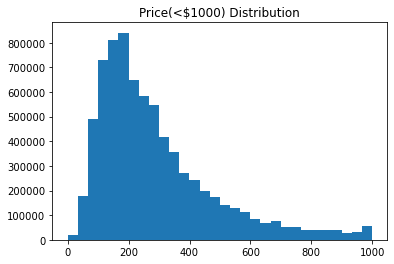

In [22]:
# Explore price distribution

# From previous EDA, we can tell the price varies widely up to $2,5000, while 75th percentile is around $406. 
# Therefore, to expose more details of the price distribution, the limit is set to 95%. 

print('95% price is below: ' + str(df_calendar.price.quantile(0.95)))
plt.hist(x = df_calendar.price[df_calendar.price < 1000], bins = 30)
plt.title('Price(<$1000) Distribution')
plt.show()

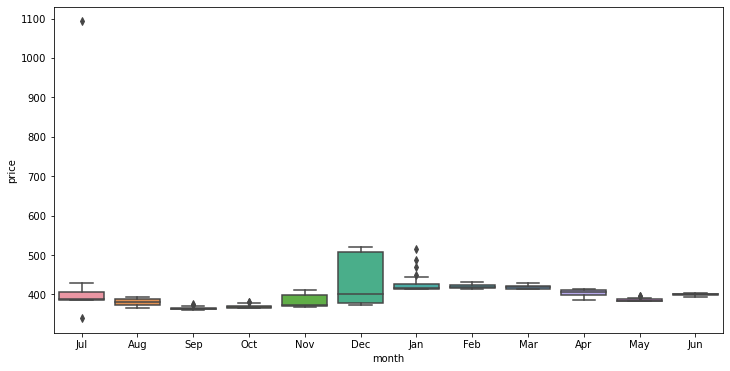

In [23]:
# Average prices over months

df_daily_price = df_calendar.groupby(by = ['date'], as_index = False)['price'].mean()
df_daily_price['month'] = df_daily_price['date'].dt.strftime('%b')
fig, ax = plt.subplots()
fig.set_size_inches((12,6))
sns.boxplot(x = 'month', y = 'price', data = df_daily_price)
plt.show()

In [24]:
# Try to understand outliers

# Find out the outlier in July
print('The extremely high price in July: \n', df_daily_price[df_daily_price['price'] > 600])

print('-------------------------------------------------------------------------')

# Check wheather the outlier is made by typo by finding out the listings in that day and other day's prices of the listing
print('Listings of that day: \n', df_calendar[df_calendar.date == '2022-07-09'])
print('-------------------------------------------------------------------------')
#print('Records of listing_id: 43358410 \n', df_calendar.query('listing_id == "43358410"'))

The extremely high price in July: 
           date   price month
366 2022-07-09  1092.5   Jul
-------------------------------------------------------------------------
Listings of that day: 
          listing_id       date available   price  adjusted_price
4492266    35797122 2022-07-09         f   175.0           175.0
5690748    43358410 2022-07-09         t  2010.0          2010.0
-------------------------------------------------------------------------


In [25]:
# Understand the outliers in January, which are Holidays

df_daily_price.query('month == "Jan" & price > 450')

,date,price,month
177,2022-01-01,515.642805,Jan
178,2022-01-02,486.443685,Jan
179,2022-01-03,470.062139,Jan


In [26]:
# Drop outliers in daily_price

df_daily_price.drop(df_daily_price[df_daily_price.date == '2022-07-09'].index, axis = 0, inplace = True)

### 2.1.2 Listings Data

In [27]:
df_listings_raw.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5065,https://www.airbnb.com/rooms/5065,20210708132536,2021-07-09,MAUKA BB,"Perfect for your vacation, Staycation or just ...",Neighbors here are friendly but are not really...,https://a0.muscache.com/pictures/36718112/1f0e...,7257,https://www.airbnb.com/users/show/7257,Wayne,2009-01-31,hawaii,HI\r\nWE LIVE HERE IN HONOKAA ON \r\nFARM JUS...,within a few hours,100%,0%,f,https://a0.muscache.com/im/users/7257/profile_...,https://a0.muscache.com/im/users/7257/profile_...,Hamakua Coast,2.0,2.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Honokaa, Hawaii, United States",Hamakua,Hawaii,20.04266,-155.43259,Entire bed and breakfast,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Free parking on premises"", ""Wifi"", ""Long ter...",$85.00,2,700,2,2,700,700,2.0,700.0,NaN,t,0,0,0,250,2021-07-09,42,0,0,2013-02-18,2020-03-22,4.60,4.69,4.69,4.79,4.71,4.48,4.76,NaN,f,1,1,0,0,0.41
1,5269,https://www.airbnb.com/rooms/5269,20210708132536,2021-07-09,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, Hawaii, United States","Lea, born and raised on the Island of Hawaii, ...",within a day,100%,55%,t,https://a0.muscache.com/im/pictures/user/16ac6...,https://a0.muscache.com/im/pictures/user/16ac6...,Island of Hawaiʻi,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kamuela, Hawaii, United States",South Kohala,Hawaii,20.02740,-155.70200,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Extra pillows and blankets"", ""Outdo...",$150.00,3,200,3,7,200,200,6.2,200.0,NaN,t,3,25,42,188,2021-07-09,12,2,0,2011-05-31,2021-04-08,4.45,4.82,4.18,5.00,4.91,5.00,4.82,119-269-5808-01R,f,3,3,0,0,0.10
2,5387,https://www.airbnb.com/rooms/5387,20210708132536,2021-07-09,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, Hawaii, United States","Kona Hawaii,\n \n Ed is a Farmer/Designer \n\n...",within an hour,90%,100%,f,https://a0.muscache.com/im/pictures/user/b895b...,https://a0.muscache.com/im/pictures/user/b895b...,Kailua/Kona,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Captain Cook, Hawaii, United States",South Kona,Hawaii,19.43081,-155.88069,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Wine glasses"",...",$85.00,5,60,5,5,1125,1125,5.0,1125.0,NaN,t,5,11,13,17

In [28]:
df_listings_raw.tail(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
21805,50900058,https://www.airbnb.com/rooms/50900058,20210708132536,2021-07-09,Hawaii Life Rentals Presents Island Sands 110 ...,"This beautiful, ground-floor honeymoon condo i...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,680107,https://www.airbnb.com/users/show/680107,Kahea,2011-06-08,"Hanalei, Hawaii, United States",Hawaii Life Vacations is a local real estate ...,within an hour,95%,89%,f,https://a0.muscache.com/im/pictures/user/4278a...,https://a0.muscache.com/im/pictures/user/4278a...,Kauaʻi,153.0,153.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Kihei-Makena,Maui,20.795679,-156.506651,Entire condominium,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Air conditioning"", ""Iron"", ""BBQ gri...",$189.00,3,60,3,7,5,60,5.1,40.1,NaN,t,9,22,37,226,2021-07-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,137,137,0,0,NaN
21806,50900602,https://www.airbnb.com/rooms/50900602,20210708132536,2021-07-09,Maui Resort Rentals: Honua Kai – Incredible 6 ...,This stunning offering combines a stunning 3br...,With a prime beachfront location on West Maui'...,https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Maui Resort Rentals,2015-07-20,"Lahaina, Hawaii, United States",The Ohana (Family) at Maui Resort Rentals has ...,within an hour,99%,99%,t,https://a0.muscache.com/im/pictures/user/40b81...,https://a0.muscache.com/im/pictures/user/40b81...,Kaanapali,234.0,234.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Lahaina, Hawaii, United States",Lahaina,Maui,20.943433,-156.690599,Entire condominium,Entire home/apt,16,NaN,6 baths,6.0,9.0,"[""Stove"", ""Extra pillows and blankets"", ""Air c...","$3,691.00",5,180,5,5,180,180,5.0,180.0,NaN,t,0,2,2,64,2021-07-09,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175-718-1952-01,t,261,257,4,0,NaN
21807,50901374,https://www.airbnb.com/rooms/50901374,20210708132536,2021-07-09,"Luxury Home in Lanikai, Ocean Views, Pool, A/C...",Welcome to Paradise! Enjoy Amazing Ocean Views...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,107293305,https://www.airbnb.com/users/show/107293305,Elite Pacific,2016-12-14,"Honolulu, Hawaii, United States",Elite Pacific Properties is the leading luxury...,within an hour,100%,86%,f,https://a0.muscache.com/im/pictures/user/a44bd...,https://a0.muscache.com/im/pictures/user/a44bd...,Poipu,210.0,210.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,NaN,Koolaupoko,Honolulu,21.382808,-157.714925,Entire house,Entire home/apt,10,NaN,4.5 baths,5.0,6.0,"[""Stove"", ""Extra pillows and blankets"", ""Air c...","$4,640.00",1,365,10,14,365,365,10.2,365.0,NaN,t,28,58,88,363,2021-07-09,0,0,0,NaN,NaN,NaN,NaN,Na

In [29]:
df_listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21808 entries, 0 to 21807
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21808 non-null  int64  
 1   listing_url                                   21808 non-null  object 
 2   scrape_id                                     21808 non-null  int64  
 3   last_scraped                                  21808 non-null  object 
 4   name                                          21808 non-null  object 
 5   description                                   21630 non-null  object 
 6   neighborhood_overview                         12309 non-null  object 
 7   picture_url                                   21808 non-null  object 
 8   host_id                                       21808 non-null  int64  
 9   host_url                                      21808 non-null 

In [30]:
df_listings_raw.shape

(21808, 74)

In [31]:
df_listings_raw.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.180800e+04,2.180800e+04,2.180800e+04,21799.000000,21799.000000,21808.000000,21808.000000,21808.000000,0.0,18756.000000,21752.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,0.0,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,21808.000000,17149.000000,17045.000000,17045.000000,17042.000000,17044.000000,17042.000000,17042.000000,21808.000000,21808.000000,21808.000000,21808.000000,17149.000000
mean,3.081776e+07,2.021071e+13,1.094124e+08,89.456122,89.456122,20.899582,-157.153646,4.615187,NaN,1.794199,2.443959,6.565985,591.736886,6.229824,11.540398,667.133988,730.863307,6.942503,705.857763,NaN,5.014628,15.633529,29.124129,173.042095,27.652605,6.088545,0.914756,4.734666,4.802431,4.743184,4.852135,4.827578,4.870874,4.689001,56.503577,55.602531,0.842122,0.014169,1.476206
std,1.484796e+07,6.691560e+00,1.041841e+08,302.231473,302.231473,0.772461,1.230771,2.362373,NaN,1.058351,1.633964,15.714308,496.642209,14.410060,33.993554,571.369283,547.901178,14.411333,549.300298,NaN,7.050318,15.281776,24.318019,101.887834,51.910806,10.290841,1.540998,0.487203,0.386689,0.404250,0.351384,0.387078,0.265624,0.415558,88.694076,88.892046,3.937580,0.245342,2.064939
min,5.065000e+03,2.021071e+13,9.080000e+02,0.000000,0.000000,18.920250,-159.714620,0.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.896497e+07,2.021071e+13,2.801776e+07,2.000000,2.000000,20.704905,-157.837310,3.000000,NaN,1.000000,1.000000,2.000000,60.000000,2.000000,3.000000,60.000000,180.000000,2.000000,127.475000,NaN,0.000000,5.000000,10.000000,94.000000,1.000000,0.000000,0.000000,4.670000,4.770000,4.670000,4.840000,4.820000,4.840000,4.600000,2.000000,1.000000,0.000000,0.000000,0.330000
50%,3.233892e+07,2.021071e+13,7.973048e+07,10.000000,10.000000,20.955470,-156.689310,4.000000,NaN,2.000000,2.000000,3.000000,365.000000,3.000000,5.000000,1125.000000,1125.000000,3.300000,1125.000000,NaN,2.000000,11.000000,22.000000,168.000000,6.000000,2.000000,0.000000,4.860000,4.920000,4.860000,4.960000,4.960000,4.940000,4.790000,11.000000,8.000000,0.000000,0.000000,0.940000
75%,4.514248e+07,2.021071e+13,1.519682e+08,93.000000,93.000000,21.287900,-156.440660,6.000000,NaN,2.000000,3.000000,5.000000,1125.000000,5.000000,7.000000,1125.000000,1125.000000,5.200000,1125.000000,NaN,6.000000,22.000000,44.000000,252.000000,31.000000,8.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.930000,78.000000,78.000000,0.000000,0.000000,1.960000
max,5.090137e+07,2.021071e+13,4.111116e+08,3925.000000,3925.000000,22.228980,-154.839500,16.000000,NaN,17.000000,38.000000,365.000000,1825.000000,365.000000,365.000000,9999.000000,9999.000000,365.000000,9999.000000,NaN,30.000000,60.000000,90.000000,365.000000,798.000000,278.000000,46.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,399.000000,399.000000,39.000000,6.000000,43.640000


In [32]:
df_listings_raw.describe(include = 'object')

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,21808,21808,21808,21630,12309,21808,21808,21799,21799,21781,15627,20263,20263,20323,21799,21799,21799,18576,21808,21799,21799,12309,21808,21808,21808,21808,21794,21808,21808,21808,21808,17149,17149,15999,21808
unique,21808,3,21466,20461,8655,21158,6755,3239,2983,1110,3961,4,68,101,2,6703,6703,228,304,2,2,208,31,4,79,4,40,17246,1475,2,3,2448,1083,12674,2
top,https://www.airbnb.com/rooms/5065,2021-07-09,Wyndham at Waikiki Beach Walk® - 2 Bedroom Deluxe,Book with confidence! This property is profess...,Poʻipū Beach Park is located in the community ...,https://a0.muscache.com/pictures/1798a186-7bfe...,https://www.airbnb.com/users/show/132087088,Maui Condo,2017-05-26,US,"Hi, we’re Vacasa, North America’s largest vaca...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/ea191...,https://a0.muscache.com/im/pictures/user/ea191...,Waikiki,"['email', 'phone', 'reviews']",t,t,"Honolulu, Hawaii, United States",Primary Urban Center,Maui,Entire condominium,Entire home/apt,1 bath,"[""Carbon monoxide alarm"", ""Stove"", ""Extra pill...",$150.00,t,2021-07-09,2021-05-31,2021-07-05,Exempt,t
freq,1,15731,22,62,118,15,399,399,400,3337,688,15924,12831,8340,13299,399,399,3345,3493,21653,17641,2613,4542,7548,11931,19810,10373,127,326,21806,15731,64,470,455,13662


In [33]:
df_listings_raw.nunique()

id                                              21808
listing_url                                     21808
scrape_id                                           1
last_scraped                                        3
name                                            21466
                                                ...  
calculated_host_listings_count                     89
calculated_host_listings_count_entire_homes        91
calculated_host_listings_count_private_rooms       22
calculated_host_listings_count_shared_rooms         6
reviews_per_month                                 831
Length: 74, dtype: int64

In [34]:
# Columns with no missing values

list(df_listings_raw.columns[df_listings_raw.isnull().mean() == 0])

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'picture_url',
 'host_id',
 'host_url',
 'host_verifications',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

The number of columns contain missing values: 34
Columns with missing values: ['description', 'neighborhood_overview', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'calendar_updated', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']


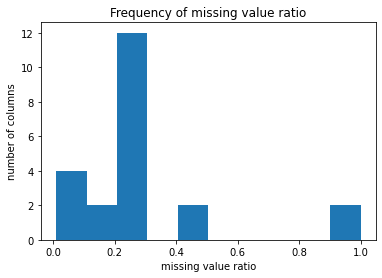

Columns with more than 90% missing values: ['bathrooms', 'calendar_updated']


In [35]:
# Check Missing values

print('The number of columns contain missing values: {}'.format(df_listings_raw.columns[df_listings_raw.isnull().mean() > 0].size))

print('Columns with missing values: {}'.format(df_listings_raw.columns[df_listings_raw.isnull().mean() > 0].tolist()))

# View missing value ratio of columns

ratio_of_missing_value = (df_listings_raw.isnull().sum() / df_listings_raw.shape[0]).round(2)
ratio_of_missing_value.where(ratio_of_missing_value > 0).plot(kind = 'hist')
plt.title('Frequency of missing value ratio')
plt.xlabel('missing value ratio')
plt.ylabel('number of columns')
plt.show()

# High missing value ratio columns

print('Columns with more than 90% missing values: {}'.format(df_listings_raw.columns[df_listings_raw.isnull().mean() > 0.9].tolist()))


In [36]:
# Check duplicates

df_listings_raw.duplicated().sum()

0

In [37]:
# Preview selected columns

#col_subset = ['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'price', 'accommodates'
#          ,'amenities', 'has_availability', 'availability_90']
#df_listings_raw[col_subset].sample(5)

IndentationError: unexpected indent (4116230002.py, line 4)

In [38]:
# Explore price

df_listings_raw['price'].describe()

count       21808
unique       1475
top       $150.00
freq          326
Name: price, dtype: object

Total number of Property Type: 79


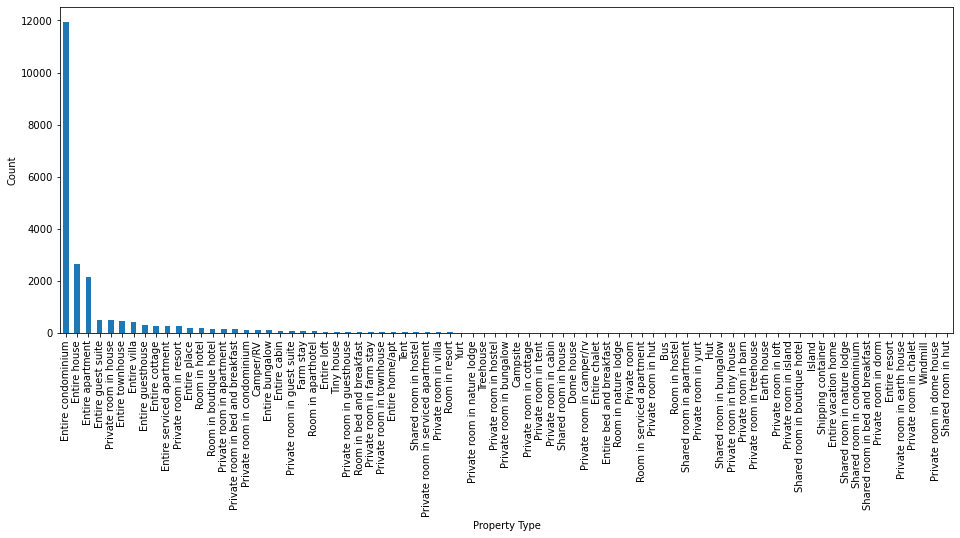

Ratio of top property types:
Entire condominium           0.547093
Entire house                 0.120598
Entire apartment             0.098679
Entire guest suite           0.023615
Private room in house        0.023157
Entire townhouse             0.020680
Entire villa                 0.019076
Entire guesthouse            0.014536
Entire cottage               0.013069
Entire serviced apartment    0.012656
Private room in resort       0.012656
Entire place                 0.008896
Room in hotel                0.008850
Room in boutique hotel       0.007749
Private room in apartment    0.007245
Name: property_type, dtype: float64


In [39]:
# Explore property type

print('Total number of Property Type: {}'.format(df_listings_raw['property_type'].nunique()))

plt.subplots(figsize = (16,6))
df_listings_raw['property_type'].value_counts().plot(kind = 'bar')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()
property_type_value_percent = df_listings_raw['property_type'].value_counts(normalize = True) 
print('Ratio of top property types:\n{}'.format(property_type_value_percent[:15]))


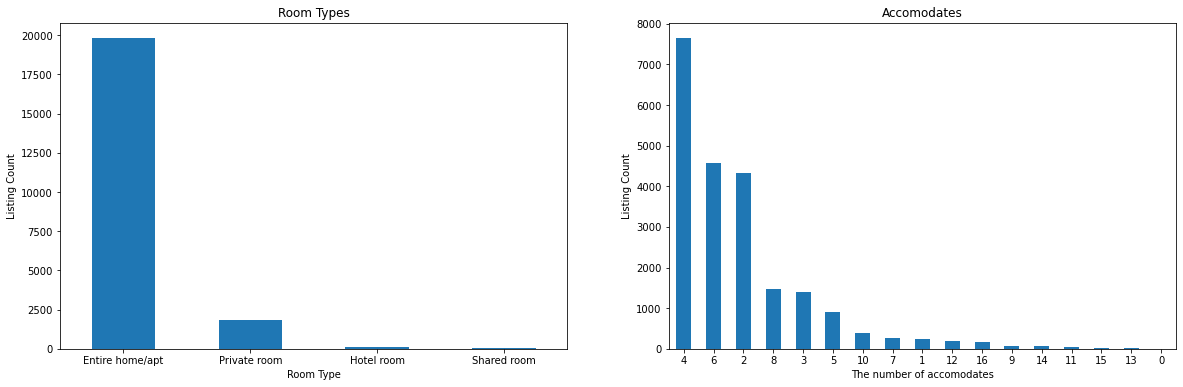

In [40]:
# Explore room type and accommodates

plt.figure(figsize = [20,6])

plt.subplot(1, 2, 1)
df_listings_raw['room_type'].value_counts().plot(kind = 'bar', rot = 0)
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Listing Count');

plt.subplot(1, 2, 2)
df_listings_raw['accommodates'].value_counts().plot(kind = 'bar', rot = 0)
plt.title('Accomodates')
plt.xlabel('The number of accomodates')
plt.ylabel('Listing Count');

Neighborbood Group: ['Hawaii', 'Kauai', 'Maui', 'Honolulu']


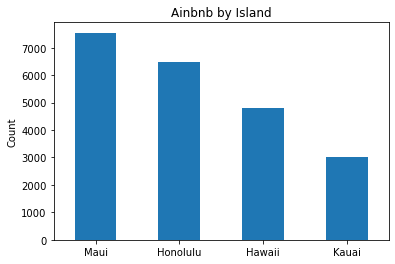

In [41]:
# Explore neighborhood, neighboorhood_group

print('Neighborbood Group: {}'.format(df_listings_raw['neighbourhood_group_cleansed'].unique().tolist()))

df_listings_raw.neighbourhood_group_cleansed.value_counts().plot(kind = 'bar', rot = 0)
plt.title('Ainbnb by Island')
plt.ylabel('Count')
plt.show()

#print("Neighborhood: {}".format(df_listings_raw.neighbourhood_cleansed.value_counts()))

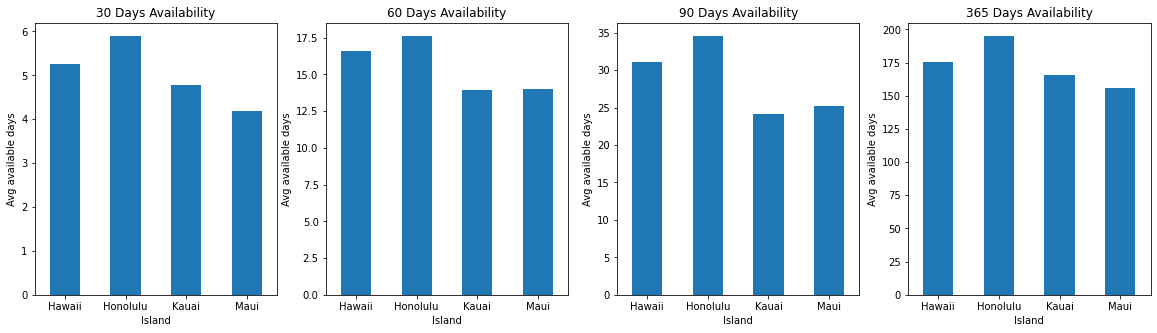

In [42]:
# Explore availability

df_availability = df_listings_raw[['id', 'neighbourhood_group_cleansed','neighbourhood_cleansed', 'has_availability', 'availability_30', 'availability_60'
                                , 'availability_90', 'availability_365']].groupby(by = 'neighbourhood_group_cleansed')

plt.figure(figsize = [20, 5])

plt.subplot(1, 4, 1)
df_availability['availability_30'].mean().plot(kind = 'bar', rot = 0)
plt.title('30 Days Availability')
plt.xlabel('Island')
plt.ylabel('Avg available days');

plt.subplot(1, 4, 2)
df_availability['availability_60'].mean().plot(kind = 'bar', rot = 0)
plt.title('60 Days Availability')
plt.xlabel('Island')
plt.ylabel('Avg available days');

plt.subplot(1, 4, 3)
df_availability['availability_90'].mean().plot(kind = 'bar', rot = 0)
plt.title('90 Days Availability')
plt.xlabel('Island')
plt.ylabel('Avg available days');

plt.subplot(1, 4, 4)
df_availability['availability_365'].mean().plot(kind = 'bar', rot = 0)
plt.title('365 Days Availability')
plt.xlabel('Island')
plt.ylabel('Avg available days')
plt.show();

### Insights

+ Listings dataset contains 21808 rows and 74 columns, 0 duplicates. 
+ There are 34 columns contain missing values, 2 columns have more than 75% missing values.
+ The price column is object type, unable to describe more details.
+ There are 79 unique values in Property_Type. Most values need to be combined. 
+ Most room types are entire home/apt.
+ Availabilities in long term are quite similare among islands.

### Wrangling

+ Drop columns with high percentage(>75%) of missing values
+ Convert price column to float type
+ Drop outliers in price column. Price column has a wide range, select the scope in this case to be price under $1000, which is reasonable to most pepole's budget.  
+ Combine values in property_type column to limit the number of types to 12


In [43]:
# Make a copy of original df_listings

df_listings = df_listings_raw.copy()

In [44]:
# Drop columns with more than 75% missing values

col_thresh = df_listings.shape[0] * 0.25
df_listings.dropna(axis = 1, thresh = col_thresh, inplace = True)
df_listings.shape

(21808, 72)

In [45]:
# Drop columns that are not useful

cols_to_drop = ['listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url', 
                'host_url',  'host_id','host_name','host_since','host_location', 'host_about','host_thumbnail_url',
                'host_picture_url', 'host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count',
                'host_verifications','host_has_profile_pic','host_identity_verified', 'calendar_last_scraped', 
                'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']


In [46]:
# Convert price column to float type

df_listings['price'] = df_listings['price'].replace({'\$': '', ',':''}, regex = True).astype('float')
df_listings.price.describe()

count    21808.000000
mean       383.803467
std        771.938632
min          0.000000
25%        150.000000
50%        233.000000
75%        389.000000
max      24999.000000
Name: price, dtype: float64

90 percentile of price is: 695.0, 95 percentile of price is : 1062.0


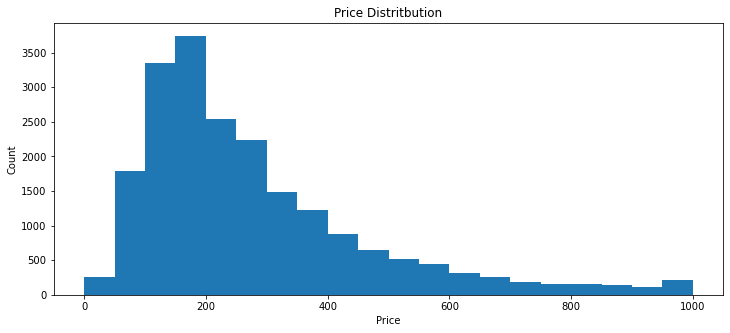

In [47]:
# Explore Price data range

print('90 percentile of price is: {}, 95 percentile of price is : {}'.format(df_listings['price'].quantile(0.90), df_listings['price'].quantile(0.95)))

# Set price range and drop outliers (price > $1000)

df_listings  = df_listings[df_listings.price <= 1000]
df_island_price = df_listings[['price', 'neighbourhood_group_cleansed','neighbourhood_cleansed']].copy()


# Visualize price

# Overall Price distribution

plt.figure(figsize = [12, 5])
plt.hist(data = df_listings, x = 'price', bins = np.arange(0, 1050, 50))
plt.title('Price Distritbution')
plt.xlabel('Price')
plt.ylabel('Count');

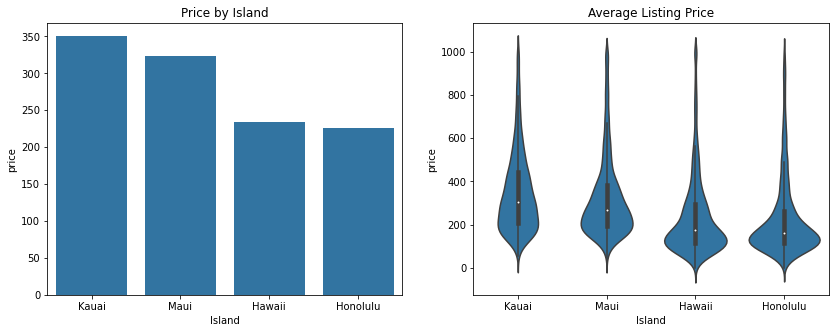

In [48]:
# Explore price

fig, ax = plt.subplots(1, 2, figsize = [14,5])
base_color = sns.color_palette()[0]

# Price comparison among islands

plt.subplot(1,2,1)
island_price_sorted = df_island_price.groupby(by = 'neighbourhood_group_cleansed').mean().reset_index().sort_values(by = 'price', ascending = False)
sns.barplot(data = island_price_sorted, x = 'neighbourhood_group_cleansed', y = 'price', color = base_color
           ).set(title = 'Price by Island', xlabel = 'Island')

plt.subplot(1,2, 2)
sns.violinplot(data = df_island_price, x = 'neighbourhood_group_cleansed', y = 'price', color = base_color,
               order = ['Kauai', 'Maui', 'Hawaii', 'Honolulu']).set(title = 'Average Listing Price', xlabel = 'Island');


## 3. Data Preparation
_This is the third phase of CRISP-DM Process -- data cleaning, data wraggling for modeling._  
  

### 3.1. Drop variables that are not needed for modeling 
This model to build is to understand factors affect Airbnb price. The original data contain 75 variables(columns). Therefore, we need to filter out some columns that are:
- Not obviously related to the price: 'id's, 'url's, 'description', 'name's, 'last_scraped','host_has_profile_pic', etc.
- High percentage of missing values: 'bathrooms', 'calendar_updated, etc (completed in EDA).
- Not available to public on Airbnb site where people make reservation: 'review_scores_accuracy', 'minimum_maximum_nights', etc.
- Information of the column can be covered by other columns: 'has_availability' is indicated by 'availability_n_days' columns

**Columns to remove:** 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url','host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'first_review',
'last_review', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic','neighbourhood', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'has_availability', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms','reviews_per_month'.

In [49]:
cols_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 
                'picture_url', 'host_id', 'host_url','host_name', 'host_since', 'host_location', 'host_about',
                'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'first_review', 
                'last_review', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic','neighbourhood', 
                'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped', 'license', 
                'calculated_host_listings_count','calculated_host_listings_count_entire_homes', 'has_availability',
                'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                'reviews_per_month']

df_listings.drop(axis = 1, columns = cols_to_drop, inplace = True)
df_listings.shape

(20625, 34)

### 3.2. Change data type

In this step, we will need to change data types to make it easy for further analysis. 
- Extract price number from object type (completed in EDA)
- Extract number in columns containing % from object type 
- Extract number from columns contain number and convert to numerical column: 'bathrooms_text'

In [50]:
# Remove % in rating values and convert to float type

rate_cols_index = df_listings.columns[df_listings.columns.str.contains('rate') == True]

for col in rate_cols_index:
    df_listings[col] = df_listings[col].map(lambda x: x.replace('%', ''), na_action = 'ignore')
    df_listings[col] = df_listings[col].astype(float)

df_listings[rate_cols_index].head()

,host_response_rate,host_acceptance_rate
0,100.0,0.0
1,100.0,55.0
2,90.0,100.0
3,90.0,100.0
4,100.0,86.0


In [51]:
# Extract number from 'bathrooms_text', convert to float type and rename to 'bath'

df_listings['bathrooms_text'] = df_listings['bathrooms_text'].str.extract('(\d+)', expand=False).astype(float)
df_listings.rename(columns = {"bathrooms_text": "bath"}, inplace = True)


### 3.3. Drop missing values

- For any row's price is null, we will drop it, as it is not useful for building the price model. (0 record)
- For any column has more than 75% missing value, we will drop it to guranteen the accuraccy of the information. (completed in EDA)

In [52]:
df_listings.price.isnull().sum()

0

### 3.4. Numerical variable analysis

- convert 'amenities' column to a numerical column(amenities_count) stands for the count of amenities provided
- Inputing missing values in numerical variables. Columns such as 'bath', 'beds', 'bedrooms' will be filled in with mode value, as their mode values occupy quite high percentage and usually the value should be an interger. Other columns such as rate columns, score columns will be filled in with mean value, standing for the average level.
- Check correlations between numerical variables and price.

In [53]:
# Create a subset of listings dataframe with all numerical columns

numerical_cols = df_listings.select_dtypes(include = ['float64', 'int64']).columns.tolist()
df_listings_num = df_listings[numerical_cols]

In [54]:
# Add the new numereical column 'amenities_count'

amenities_count = df_listings['amenities'].apply(lambda x: len(x.split(',')))
df_listings_num = df_listings_num.assign(amenities_count = amenities_count)
df_listings_num.sample(1)

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bath,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_count
8427,100.0,100.0,20.95019,-156.69014,4,1.0,1.0,2.0,349.0,3,1125,2,12,21,153,30,9,0,4.93,4.93,4.9,5.0,5.0,5.0,4.87,35


In [55]:
# List numerical columns

print(str(len(numerical_cols)) + ' numerical variables in total')

25 numerical variables in total


In [56]:
# Fill in NaN with mode/mean

null_numerical_cols = df_listings_num[numerical_cols].columns[df_listings_num[numerical_cols].isnull().sum() > 0]

for col in null_numerical_cols:
    if ('rate'in col or 'scores' in col):
        df_listings_num[col].fillna(df_listings_num[col].mean(), inplace = True)
    else:
        df_listings_num[col].fillna(df_listings_num[col].mode()[0], inplace = True)
df_listings_num[numerical_cols].isnull().sum().sum()
        

0

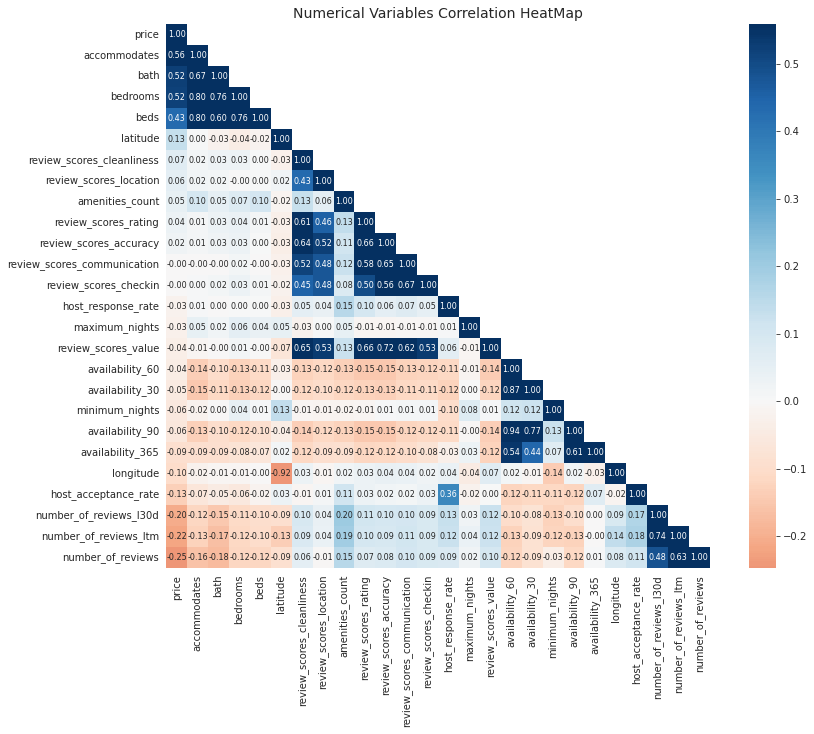

In [57]:
# Check correalations of numberical variables to price

corr_num = df_listings_num.corr().sort_values('price', axis=1, ascending=False)
corr_num = corr_num.sort_values('price', axis=0, ascending=False)
num_mask = np.zeros_like(corr_num)
num_mask[np.triu_indices_from(num_mask, k=1)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr_num, mask = num_mask, vmin = corr_num.price.min(), 
                     vmax = corr_num.drop(['price'], axis=0).price.max(), center = 0, square = True, 
                     annot = True, fmt = '.2f',cmap = 'RdBu',annot_kws = {"size": 8})
    ax.set_title('Numerical Variables Correlation HeatMap', fontdict = {'fontsize': 14})
    

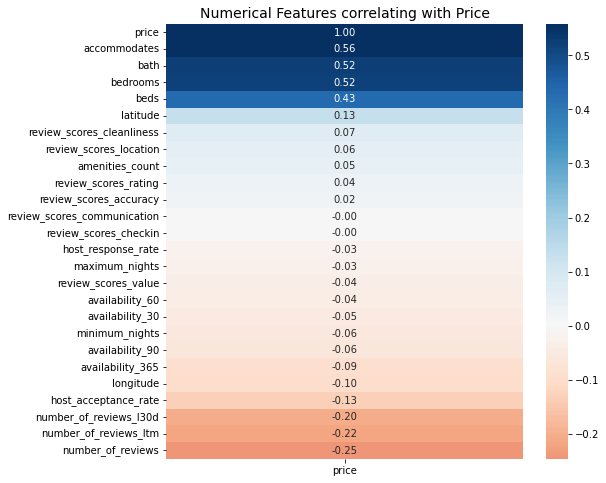

In [58]:
# Correlation of Price and other dependent numerical variables

fig, ax = plt.subplots(figsize=[8,8])

ax = sns.heatmap(corr_num[['price']].sort_values('price', ascending = False), vmin=corr_num.price.min(), 
                     vmax=corr_num.drop(['price'], axis=0).price.max(), center = 0,
                     annot=True, fmt='.2f',cmap='RdBu')
ax.set_title('Numerical Features correlating with Price', fontdict={'fontsize': 14});

#### Observations

1. We can see accomodates, bath, bedrooms, beds have a strong positive correlation to price. 
2. Suppriselingly, the number_of_reviews, number_of_reviews_last_month, number_of_reviews_130_days have pastive correlation to price.
3. Some variables, such as availability_n_days, review_score_value, have high correlation between each other.

### 3.5. Categorical variable analysis

- rename 'neighbourhood_group_cleansed' column to 'island' for convenient.
- Use label encoding scheme to transform columns with boolean value, such as 'host_is_superhost', 'host_identity_verified', instant_bookable', etc.
- Transform ordinal variables, such as host_response_time
- Others: use one-hot scheme to split column into one column per value: 'room_type', 'neighbourhood_cleansed', etc

In [59]:
# Find out categorical variables

categorical_cols = df_listings.select_dtypes(include = ['object']).columns.tolist()
df_listings_cat = df_listings[categorical_cols]

# renmae 'neighbourhood_group_cleansed' column to 'island'
df_listings_cat = df_listings_cat.rename(columns = {'neighbourhood_group_cleansed': 'island'})
categorical_cols = df_listings_cat.columns.tolist()

print(str(len(categorical_cols)) + ' categorical variables')
df_listings_cat[categorical_cols].info()

9 categorical variables
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20625 entries, 0 to 21805
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   host_response_time      19172 non-null  object
 1   host_is_superhost       20622 non-null  object
 2   host_identity_verified  20622 non-null  object
 3   neighbourhood_cleansed  20625 non-null  object
 4   island                  20625 non-null  object
 5   property_type           20625 non-null  object
 6   room_type               20625 non-null  object
 7   amenities               20625 non-null  object
 8   instant_bookable        20625 non-null  object
dtypes: object(9)
memory usage: 2.1+ MB


In [60]:
# Transform columns with boolean values

def transform_boolean_col(df, cols):
    '''
    This function transforms object-column that should be boolean type into bools and create labels for the values.  
    
    INPUT
        df - Enter the name of the dataframe 
        cols - Enter the list of columns which contain boolean value
    '''
    for col in cols:
        # make up bools
        df.loc[df[col] == 't', col] == 'True'
        df.loc[df[col] == 'f', col] == 'False'
        
        # fill in NA with the most frequency value
        df[col] = df[col].fillna(df[col].value_counts().index[0])
        
        # encode labels for the categorical columns and create new column
        label_name = "{}_label".format(col)
        le = LabelEncoder()
        labels = le.fit_transform(df[col])
        df[label_name] = labels 
        
bool_cols = ['host_is_superhost', 'host_identity_verified', 'instant_bookable']
transform_boolean_col(df_listings_cat, bool_cols)

In [61]:
# Transform ordinal variable

print("host_response_time values:\n{}\n".format(df_listings_cat['host_response_time'].value_counts()))

print("Any Na values? {}\n".format(df_listings_cat['host_response_time'].isnull().sum()))

# Fill in Na with the most frequent value

df_listings_cat['host_response_time'] = df_listings_cat['host_response_time'].fillna(df_listings_cat['host_response_time'].value_counts().index[0])

# Encode variable

rsp_time_map = {'a few days or more': 1, 'within a day': 2, 'within a few hours': 3, 'within an hour': 4}
df_listings_cat['host_response_time_label'] = df_listings_cat['host_response_time'].map(rsp_time_map)
print("host_response_time_label values:\n{}".format(df_listings_cat['host_response_time_label'].value_counts()))

host_response_time values:
within an hour        15131
within a few hours     2747
within a day           1026
a few days or more      268
Name: host_response_time, dtype: int64

Any Na values? 1453

host_response_time_label values:
4    16584
3     2747
2     1026
1      268
Name: host_response_time_label, dtype: int64


In [62]:
# Create dummies for categorical variables

neighborhood_dummies = pd.get_dummies(df_listings_cat['neighbourhood_cleansed'], prefix = 'neighborhood')
neighborhood_dummies.head()
room_type_dummies = pd.get_dummies(df_listings_cat['room_type'], prefix = 'room_type')
room_type_dummies.head()

# Drop one dummy variable of each categorical column as the baseline

neighborhood_dummies = neighborhood_dummies.drop(['neighborhood_East Honolulu'], axis = 1)
room_type_dummies = room_type_dummies.drop(['room_type_Private room'], axis = 1)


# Remove unused original columns

df_listings_cat.drop(['room_type', 'island', 'amenities', 'neighbourhood_cleansed'], axis = 1, inplace = True)


# Join dummy variables with other categorical variables
# Concatenate price column for correalation

df_listings_cat = pd.concat([df_listings_cat, neighborhood_dummies, room_type_dummies, df_listings['price']], axis = 1)
print('categorical dataset shape: {}'.format(df_listings_cat.shape))
df_listings_cat.sample(1)

categorical dataset shape: (20625, 43)


,host_response_time,host_is_superhost,host_identity_verified,property_type,instant_bookable,host_is_superhost_label,host_identity_verified_label,instant_bookable_label,host_response_time_label,neighborhood_Central Oahu,neighborhood_Ewa,neighborhood_Hamakua,neighborhood_Hana,neighborhood_Hanapepe-Eleele,neighborhood_Kapaa-Wailua,neighborhood_Kau,neighborhood_Kihei-Makena,neighborhood_Koloa-Poipu,neighborhood_Koolauloa,neighborhood_Koolaupoko,neighborhood_Lahaina,neighborhood_Lanai,neighborhood_Lihue,neighborhood_Makawao-Pukalani-Kula,neighborhood_Molokai,neighborhood_North Hilo,neighborhood_North Kohala,neighborhood_North Kona,neighborhood_North Shore Kauai,neighborhood_North Shore Oahu,neighborhood_Paia-Haiku,neighborhood_Primary Urban Center,neighborhood_Puna,neighborhood_South Hilo,neighborhood_South Kohala,neighborhood_South Kona,neighborhood_Waianae,neighborhood_Wailuku-Kahului,neighborhood_Waimea-Kekaha,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,price
1691,within an hour,f,f,Entire apartment,f,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,159.0


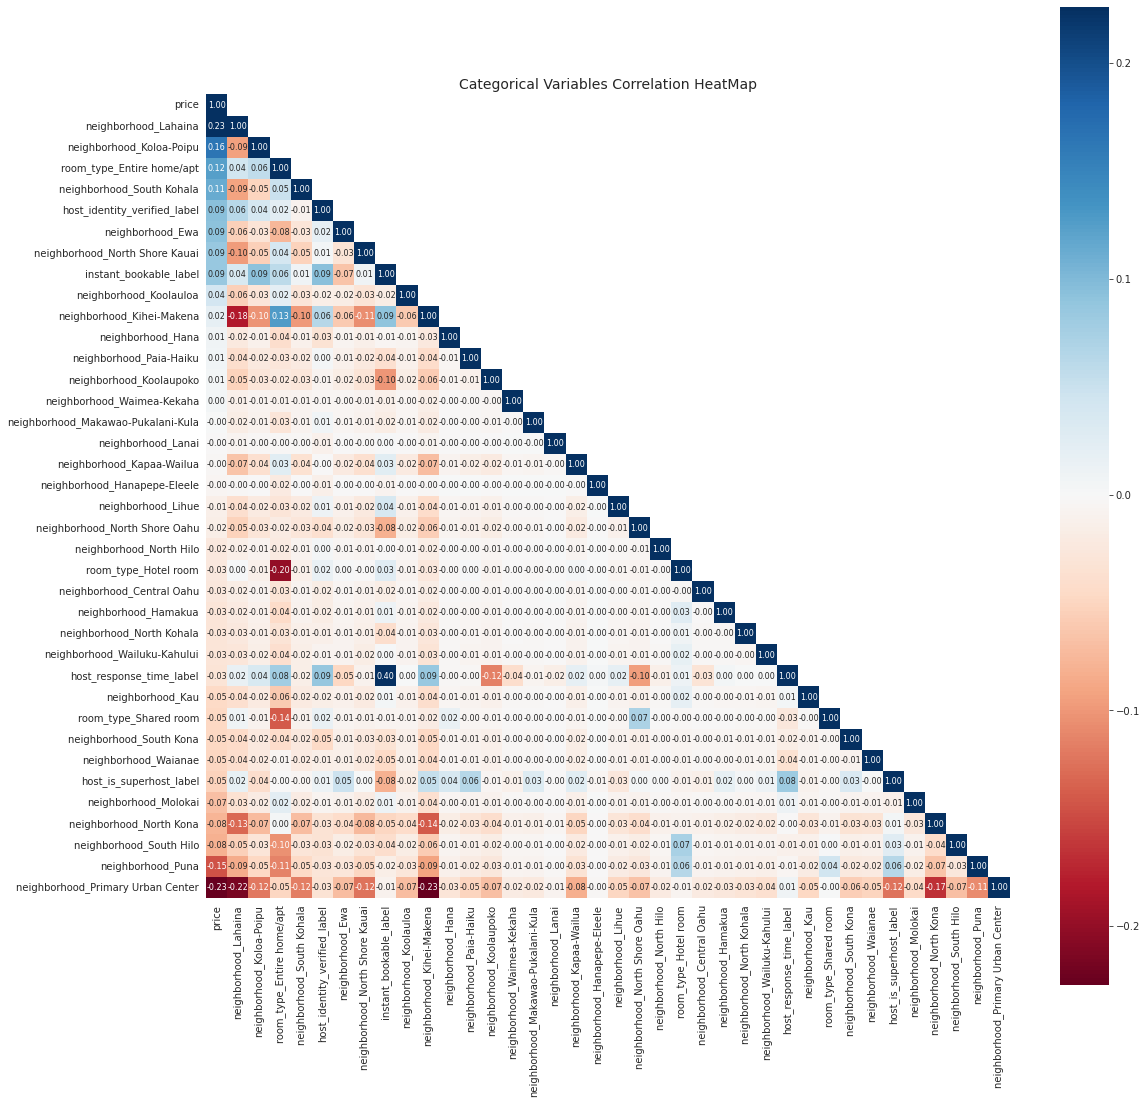

In [63]:
# Check correalations of categorical variables to price

corr_cat = df_listings_cat.corr().sort_values('price', axis=1, ascending=False)
corr_cat = corr_cat.sort_values('price', axis=0, ascending=False)
cat_mask = np.zeros_like(corr_cat)
cat_mask[np.triu_indices_from(cat_mask, k=1)] = True

#cat_mask = np.triu(np.ones_like(df_listings_cat.corr(), dtype=np.bool))
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (18, 18))
    ax = sns.heatmap(corr_cat, mask = cat_mask, vmin = corr_cat.price.min(), 
                     vmax = corr_cat.drop(['price'], axis=0).price.max(), center=0, square=True, 
                     annot = True, fmt = '.2f',cmap = 'RdBu',annot_kws = {"size": 8})
    ax.set_title('Categorical Variables Correlation HeatMap', fontdict = {'fontsize': 14})

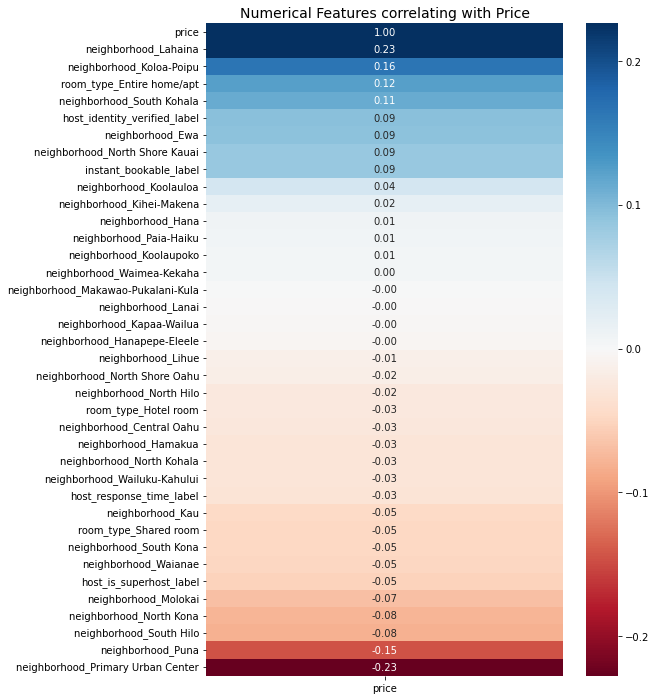

In [64]:
# Correlation of Price and other dependent categorical variables

fig, ax = plt.subplots(figsize=[8,12])

ax = sns.heatmap(corr_cat[['price']].sort_values('price', ascending = False), vmin = corr_cat.price.min(),
                 vmax = corr_cat.drop(['price']).price.max(), annot = True, fmt = '.2f', cmap = 'RdBu')
ax.set_title('Numerical Features correlating with Price', fontdict = {'fontsize': 14});


#### Observations

1. We can see overall location/neighborhood has much more influence on price than other variables on both positive and negtive direction. 


## 4. Modeling
_This is the fourth phase of CRISP-DM Process -- build prediction models._  

### 4.1 Feature Enginerring

- First remove highly correlated variables which have high coefficient > 0.9 to try to avoid variance.
- Remove variables that their information are not accessile for travelers when making reservations. Those information are not helpful to predict price for travelers, such as host_acceptance_rate, host_response_rate, etc.
- Find the most optimal linear regression model by running the model repeatedly with different pairs of numeric and categorical variables. Record the best model and the predction result. 

In [65]:
def remove_highly_correlated_variables(corr):
    '''
    This function is to remove higly correlated variables.
    
    INPUT
    corr - correlation matrix that variables will be selected from.

    OUTPUT
    to_drop - a list of columns that will be dropped
    '''
    
    corr_matrix = corr.abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.9
    to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
    
    return to_drop

# remove highly correlated variables in numerical variables and categorical variables

hightly_correlated_num_to_drop = remove_highly_correlated_variables(corr_num)
print("Numerical variables to be dropped: {}\n".format(hightly_correlated_num_to_drop))
hightly_correlated_cat_to_drop = remove_highly_correlated_variables(corr_cat)
print("Catigorical variables to be dropped: {}".format(hightly_correlated_cat_to_drop))
      

Numerical variables to be dropped: ['availability_90', 'longitude']

Catigorical variables to be dropped: []


In [66]:
# remove unuseful variables for prediction

highly_correlated_variables = hightly_correlated_num_to_drop + hightly_correlated_cat_to_drop
highly_correlated_variables.extend(['latitude', 'host_response_rate', 'host_acceptance_rate', 'price'])

In [67]:
def select_variables(data, response, number_of_var, droped_variables):
    '''
    This function is to select top variables according to the corr with price.
    
    INPUT
    data - dataframe contains all the variables
    response - str, column name of the response in corr
    number_of_var - int, number of varibles to select
    droped_variables - list of strs, the columns need to be dropped
    

    OUTPUT
    variables - dataframe, which filtered with selected variables for modeling
    '''
    corr_num = data.corr()[response].abs().sort_values(ascending=False).drop(droped_variables)[:number_of_var]
    variables = data[corr_num.index]
    
    return variables

### 4.2 Find optimal LinearRegression model

In this section, LinearRegression from sklearn is used to fit the model. The purpose is to find out the optimal model bundled with certain numeric variables and categorical variables, which has the minimum residual sum of squares between the observations in the data and the predicted target by the model.

In [68]:
def find_optimal_LR(number_of_num_var, number_of_cat_var, num_cols, cat_cols, response,
                    high_num_correlated_variables, test_size, random_state):
    '''
    This function is used to find the best linear regression model
    
    INPUT
    number_of_num_var - list of ints, number of numerical variables
    number_of_cat_var - list of ints, number of categorical variables
    num_cols - pandas dataframe, numerical variavles
    cat_cols - pandas dataframe, categorical variavles
    response - str, column name of the response
    test_size - float between 0 and 1, default 0.2, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    

    OUTPUT
    results - dict, of r2 scores for different combination of number of numerical and categorical variables
    r2_scores_test - list of floats, store all r2 scores from the test data
    r2_scores_train - list of floats, store all r2 scores from the train data
    best_r2_score_test - float, best r2 score on the test data
    best_number_of_num_var - int, the number of numerical variables matches best r2 score 
    best_number_of_cat_var - int, the number of categorical variables matches best r2 score 
    best_lm_model - optimal model object from sklearn
    best_X_train, best_X_test, best_y_train, best_y_test - output from sklearn train test split used for optimal model
    '''
    
    best_r2_score_test, best_number_of_num_var, best_number_of_cat_var = 0, 0, 0
    best_lm_model = []
    best_X_train, best_X_test, best_y_train, best_y_test = [], [], [], []
    r2_scores_test, r2_scores_train, results = [], [], dict()
    for num_num in number_of_num_var:
        for num_cat in number_of_cat_var:
            num_cols_selected = select_variables(num_cols, response, num_num, high_num_correlated_variables)
            cat_cols_selected = select_variables(cat_cols, response, num_cat, response)
            X = pd.concat([cat_cols_selected, num_cols_selected], axis=1)
            y = num_cols.price
            
            # split the data into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
            
            # fit the model and obtain pred response
            lm_model = LinearRegression()
            lm_model.fit(X_train, y_train)
            y_test_preds = lm_model.predict(X_test)
            y_train_preds = lm_model.predict(X_train)
            
            # record the process and find the best match of the model
            r2_score_test = r2_score(y_test, y_test_preds)
            if r2_score_test > best_r2_score_test:
                best_r2_score_test = r2_score_test
                best_number_of_num_var = num_num
                best_number_of_cat_var = num_cat
                best_lm_model = lm_model
                best_X_train, best_X_test, best_y_train, best_y_test = X_train, X_test, y_train, y_test
                
            # append the r2 value from the test set
            r2_scores_test.append(r2_score_test)
            r2_scores_train.append(r2_score(y_train, y_train_preds))
            variables = str(num_num) + ' num_variables,' + str(num_cat) + ' cat_variables'
            results[variables] = r2_score(y_test, y_test_preds)

    return results, r2_scores_test, r2_scores_train, best_r2_score_test, best_number_of_num_var, \
best_number_of_cat_var, best_lm_model, best_X_train, best_X_test, best_y_train, best_y_test

### 4.3 Modeling with the best linear model

In [69]:
# Find the optimal linear regressin model 

response = 'price'
number_of_num_variables = list(range(1, 25))
number_of_cat_variables = [10, 15, 20, 25, 30, 35, 40, 44]
test_size = 0.2
random_state=42

# find the best combination of selection of numerical and categorical variables,  
# and return the corresponding X_train, X_test, y_train, y_test

results, r2_scores_test, r2_scores_train, best_r2_score_test, best_number_of_num_var, \
    best_number_of_cat_var, best_lm_model, X_train, X_test, y_train, y_test \
    = find_optimal_LR(number_of_num_variables, number_of_cat_variables, df_listings_num, df_listings_cat, response, 
                      highly_correlated_variables, test_size , random_state)
print ('best_r2_score_test:')
print (best_r2_score_test)
print ('best_number_of_num_var:')
print (best_number_of_num_var)
print ('best_number_of_cat_var:')
print (best_number_of_cat_var)

best_r2_score_test:
0.5031436844695969
best_number_of_num_var:
19
best_number_of_cat_var:
40


## 5. Evaluation (Answer Business Questions)
_This is the fifth phase of CRISP-DM Process -- to evaluate if the analysis and modeling meet the business objectives._  
  

### Q1: What's the cheapest season to visit Hawaii?



In [70]:
# Calculate daily average price of each month

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_daily_price['month'] = pd.Categorical(df_daily_price['month'], categories=months, ordered=True)

monthly_avg_price = df_daily_price.groupby(['month']).price.mean().reset_index()

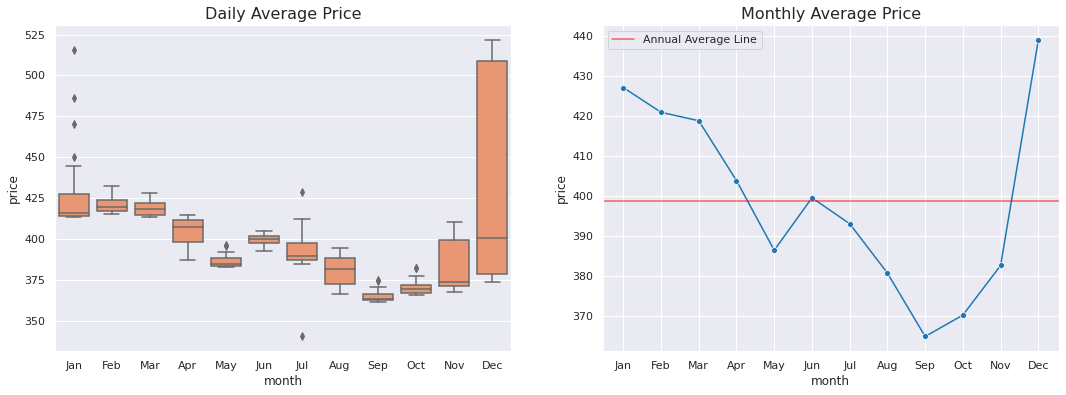

In [71]:
# Set display order by month name

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_daily_price['month'] = pd.Categorical(df_daily_price['month'], categories=months, ordered=True)

# Display daily average price distribution over monthes
plt.figure(figsize=[18,6])
with sns.axes_style("darkgrid"):
    sns.set_context("notebook")
    plt.subplot(1,2,1)
    base_color = sns.color_palette('Set2')[1]
    sns.boxplot(x = 'month', y = 'price', data = df_daily_price, color = base_color);
    plt.title('Daily Average Price', fontsize = 16);

# Display monthly average price

monthly_avg_price = df_daily_price.groupby(['month']).price.mean().reset_index()

with sns.axes_style("darkgrid"):
    sns.set_context("notebook")
    plt.subplot(1,2,2)
    splot = sns.lineplot(x = 'month', y = 'price', data = monthly_avg_price, marker = 'o')
    plt.title('Monthly Average Price', fontsize = 16)
    plt.axhline(df_daily_price.price.mean(), color = 'r', label = 'Annual Average Line', alpha = 0.6)
    for p in splot.containers:
        splot.bar_label(p, fmt = '%.2f', label_type = 'edge')
    plt.legend();


From both charts, we can see August to October is the cheapest time, while December to March is the most expensive month to visit Hawaii. The most probable cause is that the weather in Hawaii is nice so that people are more likely to visit during the colder months, thus higher prices.

From the left chart, we can see while the daily average prices are stable within a month for some months(Feb, Mar, Jun, Sep, Oct), the price range of some months (Nov, Dec) is large, which indicates the daily prices of some days within the month change significantly. We also notice some outliers for some months, especially Jan. They are most likely because of the national holidays.

### Q2. Which neighboorhood to choose？


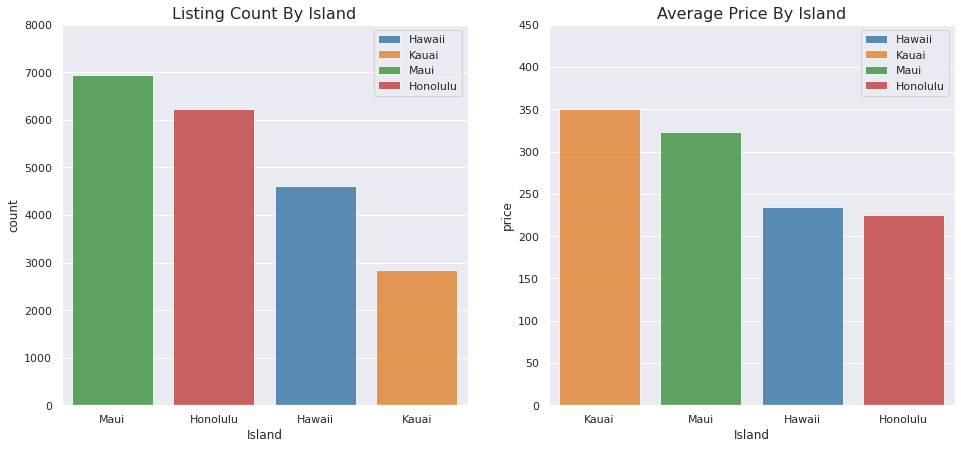

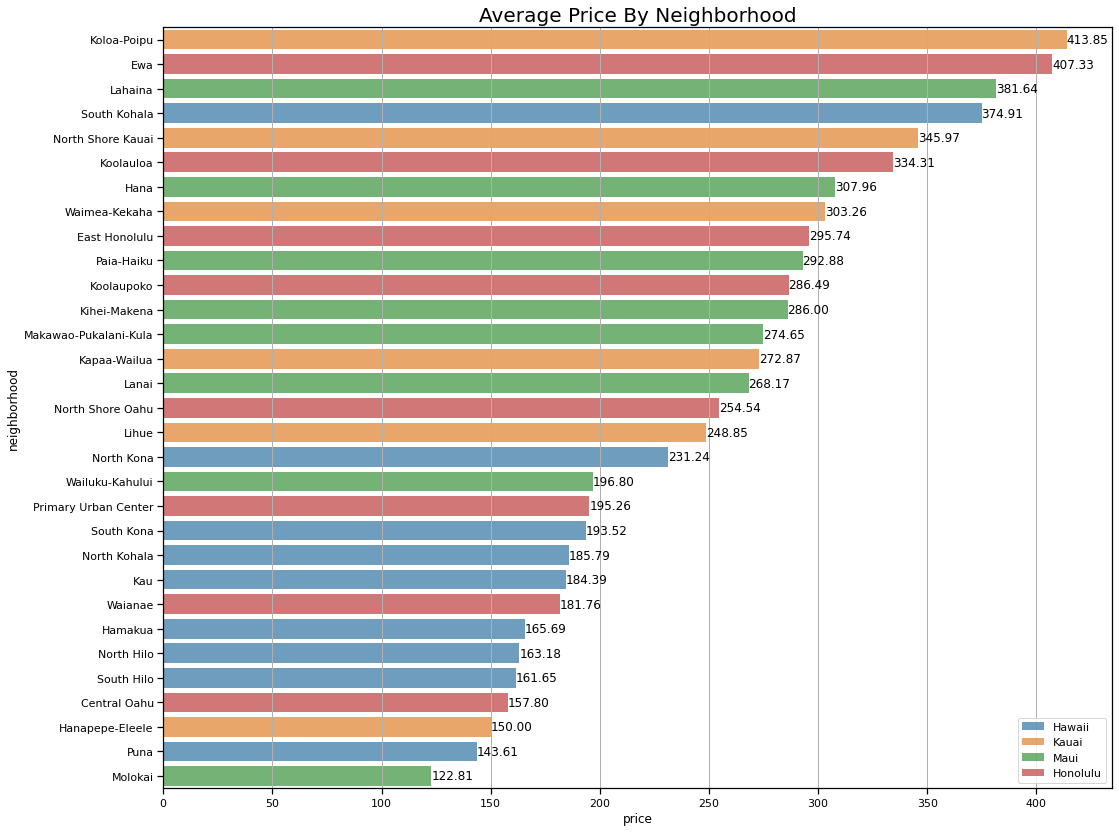

In [72]:
# Display the number of listings for each island

with sns.axes_style("darkgrid"):
    sns.set_context("notebook")
    sns.color_palette("pastel")
    plt.figure(figsize=[16,7])
    plt.subplot(1,2,1)
    sns.countplot(x = "neighbourhood_group_cleansed", data = df_island_price, alpha = 0.8, hue = 'neighbourhood_group_cleansed',
                 dodge = False, order = df_island_price['neighbourhood_group_cleansed'].value_counts().index)
    plt.ylim(top = 8000)
    plt.xlabel('Island')
    plt.title("Listing Count By Island", fontsize = 16)
    plt.legend();

# Display the average price for each island
with sns.axes_style("darkgrid"):
    sns.set_context("notebook")
    plt.subplot(1,2,2)
    island_price_order = df_island_price.groupby(by = ['neighbourhood_group_cleansed'])['price'].mean().sort_values(ascending = False).index
    sns.barplot(x = "neighbourhood_group_cleansed", y = 'price', data = df_island_price, alpha = 0.8, hue = 'neighbourhood_group_cleansed',
               dodge = False, order = island_price_order, ci = None)
    plt.ylim(top = 450)
    plt.title("Average Price By Island", fontsize = 16)
    plt.xlabel("Island")
    plt.legend();

# Display the average price of each neighborhood

neighborhood_price_order = df_island_price.groupby(by = ['neighbourhood_cleansed'])['price'].mean().sort_values(ascending = False).index

plt.figure(figsize=[17, 14])
splot = sns.barplot(x = "price", y = 'neighbourhood_cleansed', data = df_island_price, alpha = 0.7, hue = 'neighbourhood_group_cleansed',
           dodge = False, order = neighborhood_price_order, ci = None)
plt.title("Average Price By Neighborhood", fontsize = 20)
plt.xlabel("price")
plt.ylabel("neighborhood")

# show price of each bar
for p in splot.containers:
    splot.bar_label(p, fmt='%.2f', label_type='edge')
plt.grid(axis = 'x')
plt.legend();


Hawaii is special because it mainly consists of four islands. Therefore, here on one hand we group locations by the island for you to have a big picture, and on the other hand, we also take a close look at small areas, neighborhoods.

With the top-left chart, we know there are more Airbnb provided in Maui and Honolulu. Kaui has the least Airbnb listings. Meanwhile, Kauai has the highest average price among the four, probably due to its distant location and some of the more private boutique listings offered. From the average price by neighborhood chart, we can see that although Honolulu has the lowest average price, the price level are pretty evenly distributed among its neighborhoods and Hawaii island has more lower-priced neighborhoods.

### Q3. Top 10 factors affact price?  How much you need to pay?

Train R-squared: 0.496	Train RMSE: $135.00       
Test R-squared: 0.503	Test RMSE: $132.47       
Intercept of the model: -98.52


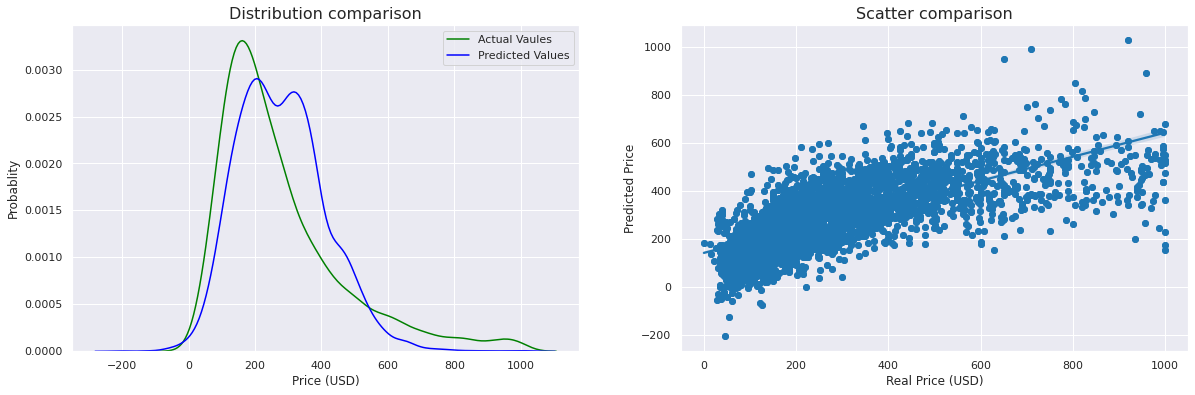

In [73]:
# Display the prediction of the best linear regression model 

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#r2 value
r2_scores_test = r2_score(y_test, y_test_preds)
r2_scores_train = r2_score(y_train, y_train_preds)
rmse_train = (mean_squared_error(y_train, y_train_preds))**0.5
rmse_test = (mean_squared_error(y_test, y_test_preds))**0.5
intercept = lm_model.intercept_

print('Train R-squared: {:.3f}\tTrain RMSE: ${:.2f}\
       \nTest R-squared: {:.3f}\tTest RMSE: ${:.2f}\
       \nIntercept of the model: {:.2f}'
       .format(r2_scores_train, rmse_train, r2_scores_test, rmse_test, intercept)
    )

plt.figure(figsize = [20,6])
with sns.axes_style("darkgrid"):
    sns.set_context("notebook")
    plt.subplot(1,2,1)
    ax1 = sns.kdeplot(data = y_test, color = 'g', label = 'Actual Vaules')
    ax2 = sns.kdeplot(data = y_test_preds, color = 'b', label = 'Predicted Values')
    plt.title('Distribution comparison', fontsize=16)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel('Price (USD)', fontsize=12)
    plt.legend();

    plt.subplot(1,2,2)
    sns.regplot(x = y_test, y = y_test_preds)
    plt.title('Scatter comparison', fontsize=16)
    plt.scatter(y_test, y_test_preds)
    plt.xlabel('Real Price (USD)', fontsize=12)
    plt.ylabel('Predicted Price', fontsize=12);

With the best model selected(19 numeric and 40 categorical variables), our model obtained an R-squared score of around 50% meaning that we can account for around 50% of the variance using our features using Linear Regression. We also need to bear in mind the significant standard deviation of the residuals represented by the $132 root-mean-squared error. Predictions made with the model have a large error margin.

The scatter plot shows a positive linear trend, which is expected. While the data selected for modeling are all target to under \\$1000, we can see from the chart that prediction for the lower range(<$400) is more accurate. There are still many outliers indicating a loss of accuracy on those points. This could be because of the lack of some important information that has an influence on price, such as details of fees, etc.

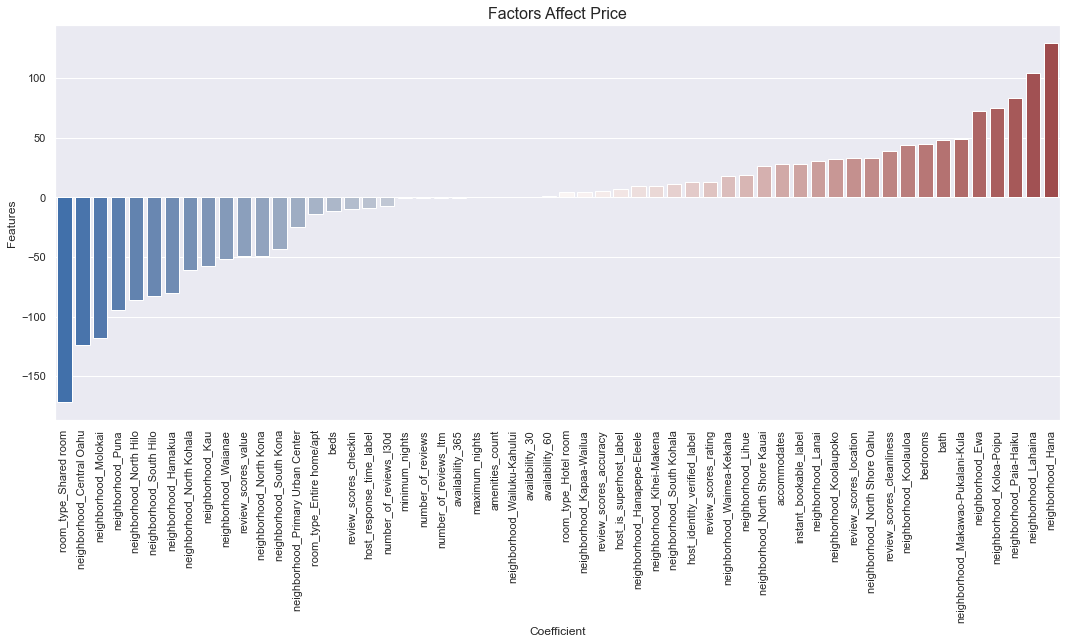

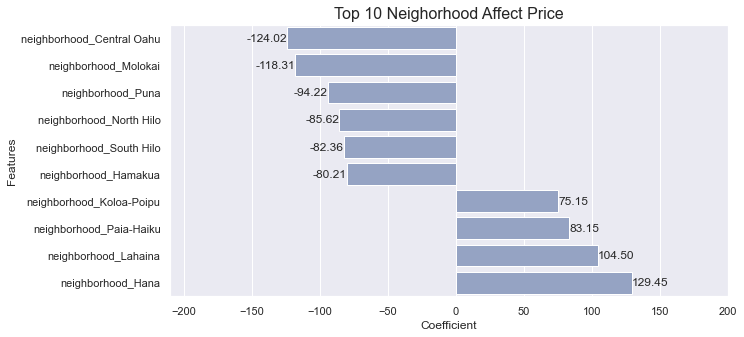

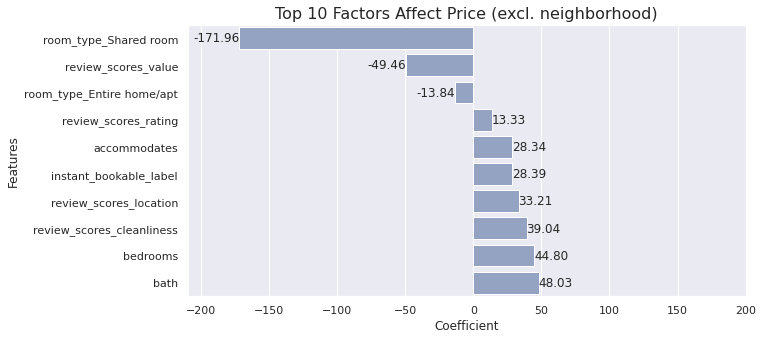

In [74]:
# Display all feature importance of the best linear regressino model

feature_importance = pd.DataFrame({'features': X_test.columns, 'coefficients': lm_model.coef_}).sort_values(by='coefficients').reset_index()

plt.figure(figsize = [18,16])
with sns.axes_style("darkgrid"):
    sns.set_context("notebook")
    plt.subplot(2,1,1)
    sns.barplot(y='coefficients', x='features', data=feature_importance, palette='vlag')
    plt.title('Factors Affect Price', fontsize=16)
    plt.xlabel('Coefficient', fontsize = 12)
    plt.ylabel('Features', fontsize=12)
    plt.tick_params(axis='x', rotation=90);

# Disply the top 10 neighborhood that affect price most
#top_10_coeff = feature_importance['coefficients'].abs().sort_values(ascending=False)[:10].index
#top_factors = feature_importance.iloc[top_10].sort_values(by = 'coefficients', ascending=True)

neighborhood_cols = feature_importance[feature_importance['features'].str.startswith('neighborhood')]
top_10_neighborhood_coeff = neighborhood_cols['coefficients'].abs().sort_values(ascending=False)[:10]
top_10_neighborhood_factors = neighborhood_cols[neighborhood_cols['coefficients'].abs().isin(top_10_neighborhood_coeff)]

plt.figure(figsize=[10,5])
with sns.axes_style("darkgrid"):
    sns.set_context("notebook")
    splot_overall = sns.barplot(x='coefficients', y='features', data=top_10_neighborhood_factors, color=sns.color_palette("Set2")[2])
    for p in splot_overall.containers:
        splot_overall.bar_label(p, fmt='%.2f', label_type='edge')
    plt.title('Top 10 Neighorhood Affect Price', fontsize=16)
    plt.xlabel('Coefficient', fontsize = 12)
    plt.ylabel('Features', fontsize=12)
    plt.xlim(left = -210, right=200)
    plt.show();

# Display the top 10 factors other than neighborhood that affect price most

non_neighborhood_cols = feature_importance[~feature_importance['features'].str.startswith('neighborhood')]
other_top_10_coeff = non_neighborhood_cols['coefficients'].abs().sort_values(ascending=False)[:10]
other_top_10_factors = non_neighborhood_cols[non_neighborhood_cols['coefficients'].abs().isin(other_top_10_coeff)]

with sns.axes_style("darkgrid"):
    sns.set_context("notebook")
    plt.figure(figsize=[10,5])
    splot_others = sns.barplot(x='coefficients', y='features', data=other_top_10_factors, color=sns.color_palette("Set2")[2])
    for p in splot_others.containers:
        splot_others.bar_label(p, fmt='%.2f', label_type='edge')
    plt.title('Top 10 Factors Affect Price (excl. neighborhood)', fontsize=16)
    plt.xlabel('Coefficient', fontsize = 12)
    plt.ylabel('Features', fontsize=12)
    plt.xlim(left = -210, right=200);

With the above visualizations, we can see some features have little to no impact on the price according to our linear regression model:
 + some info about the host: number of reviews, number of reviews last month
 + some common info of the Airbnb which barely have difference among all listings: minimum_nights, maximum_nights, availability_n_days.
 
In general, it's obvious that neighborhoods have much heavier weight to determine the price. Other factors such as room type, the number of bedrooms/bathrooms, accommodates alongside the scores of the listing stand out as key features in deciding the price.

To get a rough idea of how much you need to pay for your Airbnb, you to go through the different features and add/subtract the coefficients, compared to the baseline. Previously in the modeling, it is selected to build on 'East Honolulu' neighborhood and the room type is a private room. Also, you need to add the 'intercept' of the model, in our case −$98. That means you need to subtract \\$98 from the final price. The intercept is negative because we have certain features such as bedrooms which start at 1 instead of 0.

For example, if I would like to have a two bedrooms entire home(2 bedrooms, 2 bathrooms for 4 people) in Hana area, compared with the baseline(a private room with 1 bedroom in East Honolulu). I will need to pay for a single factor, if other factors remain the same:

\+\\$129 for the Hana neighbourhood<br />
−\\$13  for entire room<br />
\+\\$28  if book instantly<br />
\+\\$63  for an additional bedroom<br />
\+\\$48  for an additional bathroom<br />
\+3×\\$28 for the place accommodates 4 people, which is 3 more people<br />
−\$98  for the intercept<br />